# Miniproject Numerische Methoden 
## Project 1: Classes and Dictionaries 

For this Miniproject a Code had to be written to calculate the optical depth and transmissivity at given distance R from the planets radius and and at given wavelength $\lambda$. The necessary parameters are saved in a dictionary in a separate file, which can be called as a module in this main file. The physics and all the calculations are also saved with a class in a separate file. This makes the calculation of the two parameters in the main file easy with only minimal coding. Furthermore, the Cross-section file gets loaded in the class to determine $\sigma$. 

First we need some imports

In [70]:
import numpy as np 
import matplotlib.pyplot as plt 
import importlib 

The data file "CO2 miniproject.dat.txt" needs to be opened. Because of the big header, which contains information about Pressure, Temperature, number of molecules and index and the concentration of CO2, the first 15 rows need to be skipped. The Code underneath prints the tabel with the columns being $\nu$ [cm^-1], $\sigma$ [cm^2/molecule] and k [m^-1]. 

In [10]:
data = np.loadtxt("CO2_mini-project_1.dat.txt", skiprows = 15) 

nu = data[:, 0] # cm^-1
sigma = data[:, 1] # cm^{2}/molecule 
k = data[:, 2] # m^-1 

print(data)

def read_header_info(filename):
    info = {}
    with open(filename) as f:
        for line in f:
            if "Pressure" in line:
                info["pressure_atm"] = float(next(f))
            if "Temperature" in line:
                info["temperature_K"] = float(next(f))
            if "Name:" in line:
                info["molecule"] = next(f).strip()
    return info


[[5.00010000e+02 1.54741267e-29 5.68172637e-14]
 [5.00020000e+02 1.54758336e-29 5.68235311e-14]
 [5.00030000e+02 1.54775433e-29 5.68298088e-14]
 ...
 [9.99998000e+03 8.22987511e-32 3.02181180e-16]
 [9.99999000e+03 8.22985363e-32 3.02180391e-16]
 [1.00000000e+04 8.22983215e-32 3.02179602e-16]]


Two additional Jupyter-files, which can be viewed in the Mini-Project folder, contain a dictionary for the parameters "params.py" and the Code for calculating the optical depth and transmissivity "atmosphere.py". The calculations were conducted as described in the assignment by using the radiative transfer equations, the barometric hight formula and the Beer-Lambert law. To use the module in this main file, one needs to import the modules. 

In [80]:
import atmosphere

During the process of coding the Mini-project, it was necessary to make a few changes in "atmosphere.py" and "params.py". In order to use the updated versions of those Codes, the modules need to be reloaded in the main file. 

In [75]:
import atmosphere
importlib.reload(atmosphere)


<module 'atmosphere' from 'C:\\Users\\InesH\\atmosphere.py'>

In [74]:
import params
importlib.reload(params) 

<module 'params' from 'C:\\Users\\InesH\\params.py'>

It is now possible, to use the module to calculate the optical depth and the transmissivity. In the first case, we define $\lambda$ and R within the function in the main file and use the module atmosphere to calculate the two values. 
Results: The values for $\tau$ should be between 0.01 – 100. If $\tau$ << 1: transparent, for $\tau$ ~ 1: partially absorbing, and for $\tau$ >> 1: opaque. The transmissivity should be between 0 and 1.The optical depth for this example is extremely small, which means the atmosphere at the given wavelength is extremely transparent, which is confirmed by the transmissivity being close to 1.The selected wavelength shows that CO2 is strongly absorbend at this wavelength. This highlights the strong dependency of the optical depth on wavelength. 

In [76]:
import atmosphere
tau, T = atmosphere.opticaldepth(4.27, 6.5e6) # wavelength [µm]; distance R [m] 

print("optical depth:", tau)
print("transmissivity:", T) 

optical depth: 1.27415614078367e-08
transmissivity: 0.9999999872584386


In [77]:
import atmosphere
from params import params

atm = atmosphere.Atmosphere(params)

print(atm.sigma_interp(4.3)) 

2.7610011742020106e-29


The following plot for optical depth shows a sharp peak at a wavelength of around 4.27 $\mu$m. This is due to molecular absorption lines of CO2, which absorbs radiation only at discrete energies corresponding to molecular vibrational transitions. Outside these lines the atmosphere is nearly transparent.

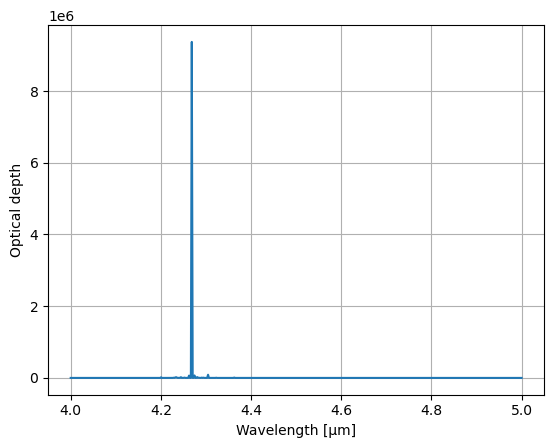

In [78]:
lam_grid = np.linspace(4.0, 5.0, 500)

atm = atmosphere.Atmosphere(params)

tau_vals = [atm.optical_depth(lam, 6.371e6)[0] for lam in lam_grid]

plt.plot(lam_grid, tau_vals)
plt.xlabel("Wavelength [µm]")
plt.ylabel("Optical depth")
plt.grid() 
plt.show()
 

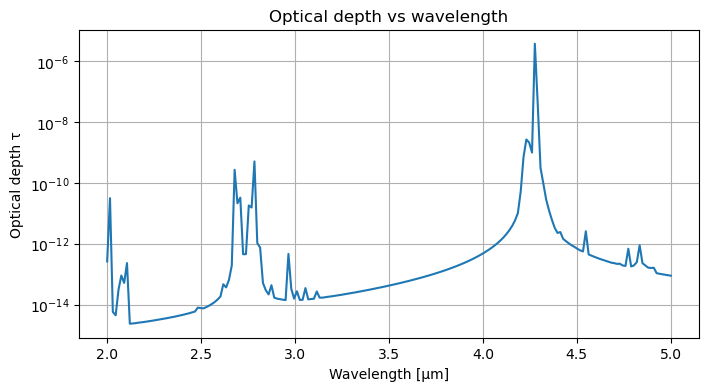

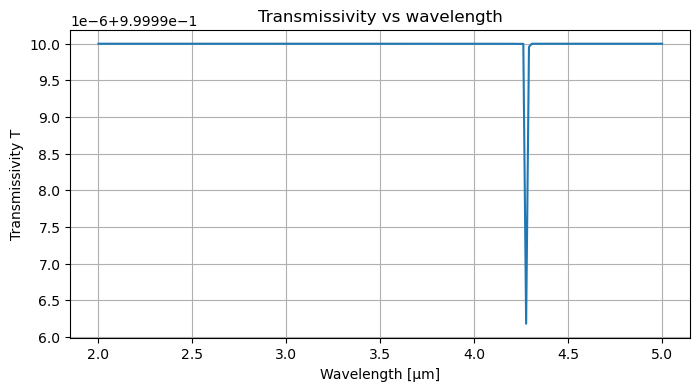

In [79]:
import numpy as np
import matplotlib.pyplot as plt

lams = np.linspace(2.0, 5.0, 200)  # µm
taus = []
Ts = []

for lam in lams:
    tau, T = atmosphere.opticaldepth(lam, 6.5e6)
    taus.append(tau)
    Ts.append(T)

plt.figure(figsize=(8,4))
plt.semilogy(lams, taus)
plt.xlabel("Wavelength [µm]")
plt.ylabel("Optical depth τ")
plt.title("Optical depth vs wavelength")
plt.grid()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(lams, Ts)
plt.xlabel("Wavelength [µm]")
plt.ylabel("Transmissivity T")
plt.title("Transmissivity vs wavelength")
plt.grid()
plt.show()


In [ ]:
a